## **In this code, we will explore masking, an extremely powerful and useful technique in computer vision and image processing.**

First we need to mount our code with google drive.

In [3]:
# To mount code with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import all the package that we will use for the code.

In [0]:
# Import the necessary packages
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

Set the path for the image that we will use for testing the code.

When you mount the code, folder **"drive"** will appear on the left screen when you click the **"file"** symbol. Then you just need to find the image in your drive and right click on that image.

A pop up will show some list then just click **"copy path"**. After that you just need to paste the path here.

In [0]:
# Construct the argument parser and parse the arguments
args = {
	# Task 1
	"image": '/content/drive/My Drive/Colab Notebooks/Image-Processing/corona.png',
	"image2": '/content/drive/My Drive/Colab Notebooks/Image-Processing/flower.jpg'
}

Now that we have the path to the image, we can load it off the disk using the cv2.imread function on Line 1. The cv2.imread function returns a NumPy array representing the image.

Then, displaying the actual image on our screen. The parameter is a reference to the image we loaded before.

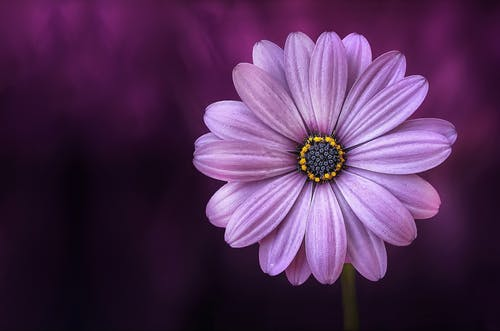

In [25]:
# Task 2
# Load the image and show it here :
image = cv2.imread(args["image2"])

cv2_imshow(image)

Masking allows us to focus only on parts of an image that interest us. A mask is the same size as our image, but has only two pixel values, 0 and 255. Pixels with a value of 0 are ignored in the orignal image, and mask pixels with a value of 255 are allowed to be kept. For example, let's construct a mask with a 150x150 square at the center of it and mask our image.

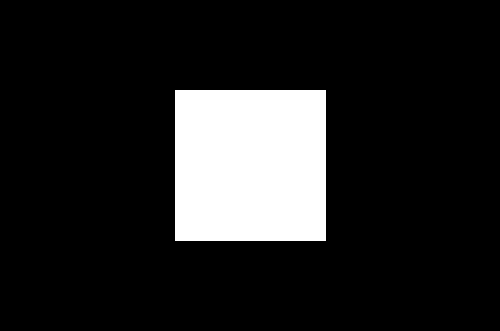

In [28]:
mask = np.zeros(image.shape[:2], dtype = "uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
maskedimg = cv2.rectangle(mask, (cX - 75, cY - 75), (cX + 75 , cY + 75), 255, -1)
# Task 3
# show the mask image here :
cv2_imshow(maskedimg)

We apply our mask on Line 3 using the cv2.bitwise_ and function. The ﬁrst two parameters are the image itself. Obviously, the AND function will be True for all pixels in the image; however, the important part of this function is the mask keyword argument. By supplying a mask, the cv2.bitwise_and function only examines pixels that are “on” in the mask. In this case, only pixels that are part of the white rectangle.

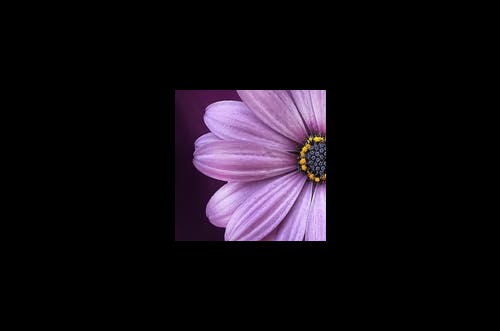

In [29]:
# Apply out mask -- notice how only the center rectangular
# region of the pill is shown
masked = cv2.bitwise_and(image, image, mask = mask)
# Task 4
# show the masked image here :
cv2_imshow(masked)

On Line 2 we re-initialize our mask to be ﬁlled with zeros and the same dimensions as our beach image. Then, we draw a white circle on our mask image, starting at the center of the image and a radius of 100 pixels. Applying the circular mask is then performed on Line 4, again using the cv2.bitwise_and function.

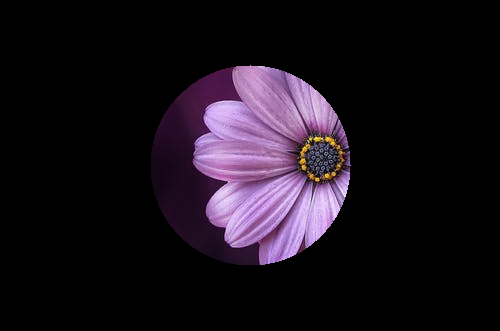

In [32]:
# Now, let's make a circular mask with a radius of 100 pixels
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, (cX, cY), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)
# Task 5
# show the mask and masked image here :
cv2_imshow(masked)